In [12]:
import rrcf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tensorflow as tf
import keras
import keras.optimizers as optimizers
from keras import layers, callbacks
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import random

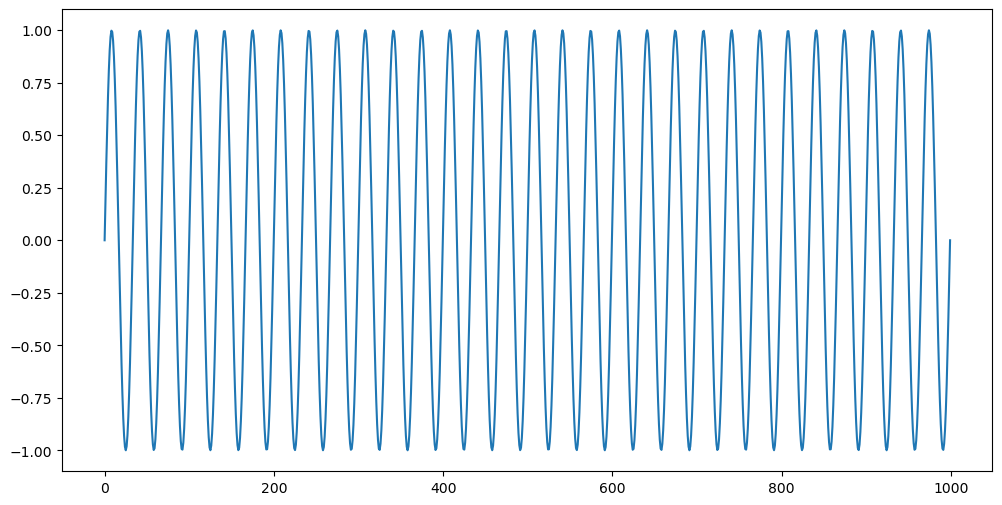

In [27]:
plt.figure(figsize=(12, 6))
x_0 = np.sin(np.linspace(0, 60 * np.pi, 1000))
x_1 = np.sin(np.linspace(0, 60 * np.pi, 1000))
x_1[165:172] = x_1[165]
plt.plot(x_0)
plt.show()

In [28]:
scaler = MinMaxScaler()
x_0 = scaler.fit_transform(pd.DataFrame({'values': x_0}))
x_1 = scaler.fit_transform(pd.DataFrame({'values': x_1}))
x_0.shape

(1000, 1)

In [29]:
def to_sequences(x, y, seq_size):
    x_values, y_values = [], []
    for i in range(len(x) - seq_size):
        x_values.append(x[i:(i+seq_size)])
        y_values.append(y[i+seq_size])
    x_values, y_values = np.array(x_values), np.array(y_values)
    x_values = x_values.reshape(x_values.shape[0], x_values.shape[1], 1)
    return x_values, y_values

In [30]:
trainX, trainY = to_sequences(x_0, x_0, 100)
testX, testY = to_sequences(x_1, x_1, 100)
trainX.shape

(900, 100, 1)

In [31]:
model = keras.Sequential()
model.add(layers.LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(layers.LSTM(64, activation='relu', return_sequences=False))
model.add(layers.RepeatVector(trainX.shape[1]))
model.add(layers.LSTM(64, activation='relu', return_sequences=True))
model.add(layers.LSTM(128, activation='relu', return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(trainX.shape[2])))

model.compile(optimizer='adam', loss='mse')
history = model.fit(trainX, trainX, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/50
7/7 [==============================] - 7s 475ms/step - loss: 0.3318 - val_loss: 0.1917
Epoch 2/50
7/7 [==============================] - 3s 414ms/step - loss: 0.1702 - val_loss: 0.1564
Epoch 3/50
7/7 [==============================] - 3s 442ms/step - loss: 0.1589 - val_loss: 0.1388
Epoch 4/50
7/7 [==============================] - 3s 439ms/step - loss: 0.1413 - val_loss: 0.1381
Epoch 5/50
7/7 [==============================] - 3s 439ms/step - loss: 0.1375 - val_loss: 0.1350
Epoch 6/50
7/7 [==============================] - 3s 458ms/step - loss: 0.1362 - val_loss: 0.1325
Epoch 7/50
7/7 [==============================] - 3s 458ms/step - loss: 0.1346 - val_loss: 0.1312
Epoch 8/50
7/7 [==============================] - 3s 487ms/step - loss: 0.1331 - val_loss: 0.1304
Epoch 9/50
7/7 [==============================] - 3s 468ms/step - loss: 0.1322 - val_loss: 0.1296
Epoch 10/50
7/7 [==============================] - 3s 480ms/step - loss: 0.1314 - val_loss: 0.1289
Epoch 11/50
7/7 [==

KeyboardInterrupt: 

In [32]:
predictions = model.predict(trainX)
predictions.shape

29/29 [==============================] - 2s 59ms/step


(900, 100, 1)

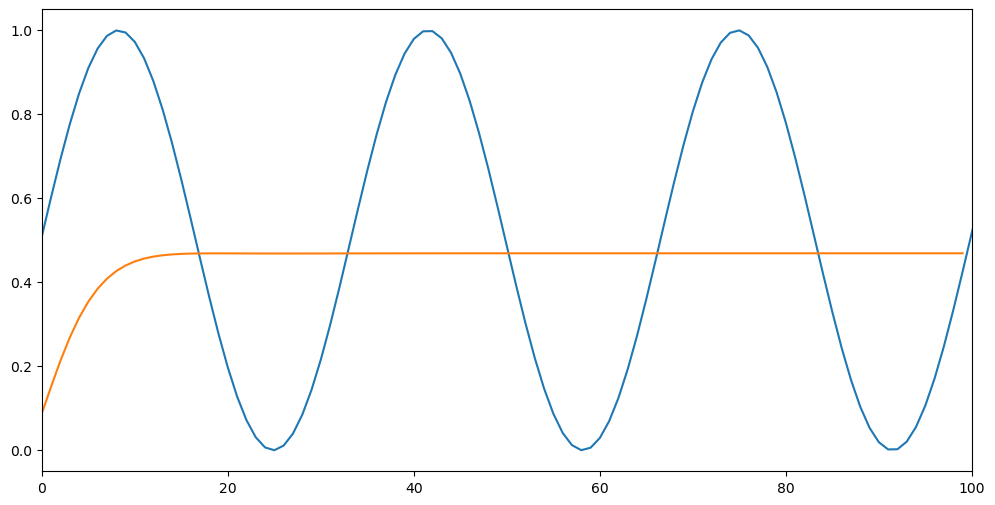

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(x_0[100:])
plt.plot(predictions[0,:,0])
plt.xlim([0,100])
plt.show()

In [9]:
predictions1 = model.predict(testX)
predictions1.shape

29/29 [==============================] - 1s 45ms/step


(900, 1)

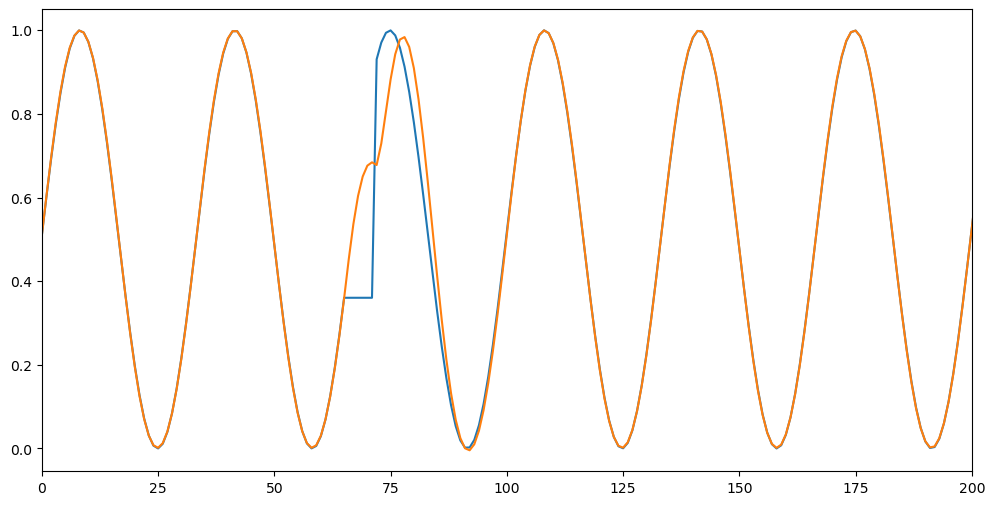

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(x_1[100:])
plt.plot(predictions1)
plt.xlim([0, 200])
plt.show()